# Usage of MyTranslationDataset class

In [1]:
# Initialization Cell
data_en = 'C:\\Users\\under\\Datasets\\Neural-Machine-Translation\\Europarl_fr-en\\europarl-v7.fr-en.en'
data_fr = 'C:\\Users\\under\\Datasets\\Neural-Machine-Translation\\Europarl_fr-en\\europarl-v7.fr-en.fr'

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from utils import preprocess
from scipy.stats import spearmanr

In [3]:
en, fr = preprocess.readFiles(data_en, data_fr)

Text(0.5, 1.0, 'The Distribution of English Sentence Length by Words')

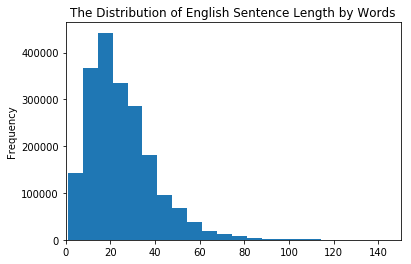

In [10]:
df_en = pd.DataFrame(en, columns=['text'])
df_en['text'].str.split(' ').apply(len).plot.hist(bins=100)
plt.xlim(0,150)
plt.title('Distribution of English Sentence Length by Words')

Text(0.5, 1.0, 'The Distribution of French Sentence Length by Words')

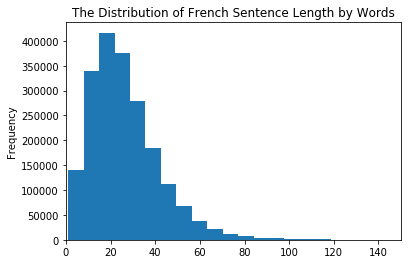

In [11]:
df_fr = pd.DataFrame(fr, columns=['text'])
df_fr['text'].str.split(' ').apply(len).plot.hist(bins=100)
plt.xlim(0,150)
plt.title('Distribution of French Sentence Length by Words')

Text(0.5, 1.0, 'Distribution of Differences in Sentence Length by Words')

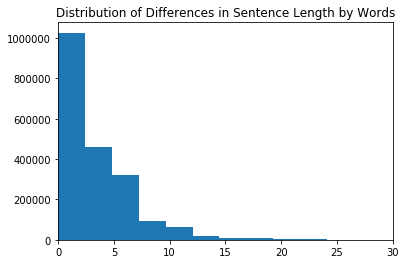

In [17]:
plt.hist([abs(len(s_en.split())-len(s_fr.split())) for s_en, s_fr in zip(en,fr)], bins=100)
plt.xlim(0,30)
plt.title('Distribution of Differences in Sentence Length by Words')

In [15]:
len_pair = [(len(en_sen.split()), len(fr_sen.split())) for en_sen, fr_sen in zip(en,fr)]
df=pd.DataFrame(len_pair, columns=['en_len','fr_len'])

r,p = spearmanr(df['en_len'], df['fr_len'])

In [27]:
df['en_len'] = df['en_len']*20

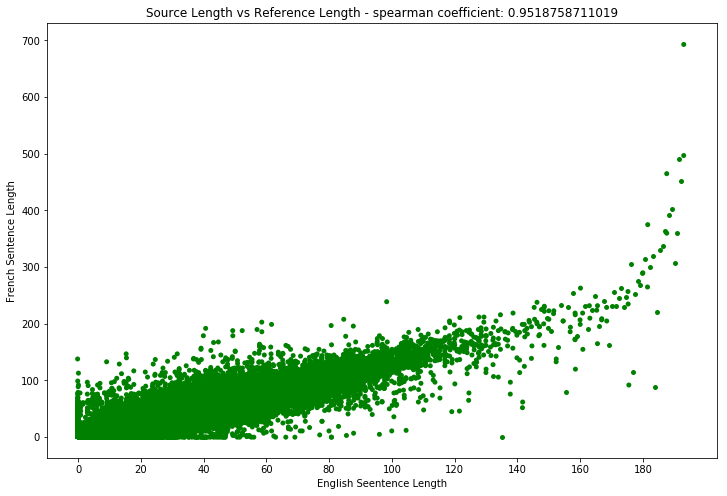

In [30]:
import numpy as np
plt.figure(figsize=(12,8))
sns.stripplot(data=df, x='en_len', y='fr_len', color='green', jitter=0.2)
plt.ylabel('French Sentence Length')
plt.xlabel('English Seentence Length')
plt.title(f'Source Length vs Reference Length - spearman coefficient: {r}')
plt.locator_params(axis='x', nbins=10)

In [18]:
np.arange(0, 700, step=100)

array([  0, 100, 200, 300, 400, 500, 600])

In [21]:
df[df['en_len']==668]

,en_len,fr_len
1721334,668,497
1764998,668,693


In [22]:
en[1721334]

"B4-0825/97 by Mrs André-Léonard, Mr Fassa and Mr Bertens, on behalf of the Group of the European Liberal, Democratic and Reformist Party, on the withdrawal of the UN investigation team from Congo; -B4-0832/97 by Mrs Aelvoet and Mr Telkämper, on behalf of the Green Group in the European Parliament, on the UN mission of inquiry in Congo; -B4-0850/97 by Mr Dury and Mr Swoboda, on behalf of the Group of the Party of European Socialists, on the refusal to allow a UN mission of inquiry in the Democratic Republic of Congo; -B4-0856/97 by Mr Hory, Mr Dell'Alba and Mr Dupuis, on behalf of the Group of the European Radical Alliance, on the UN mission of inquiry into human rights violations in the Democratic Republic of the Congo; -B4-0863/97 by Mr Chanterie, Mr Stasi, Mr Tindemans, Mr Verwaerde, Mrs Maij-Weggen and Mrs Oomen-Ruijten, on behalf of the Group of the European People's Party, on the situation in the Democratic Republic of Congo; -B4-0877/97 by Mr Pettinari, Mr Carnero González, Mr O

In [12]:
# Example of sentence with more than 100
en_long = df_en[df_en['text'].str.split(' ').apply(len)>100]
for i in range(3):
    print(en_long.iloc[i,:].values,'\n')

["In my opinion, this second hypothesis would imply the failure of Parliament in its duty as a Parliament, as well as introducing an original thesis, an unknown method which consists of making political groups aware, in writing, of a speech concerning the Commission' s programme a week earlier - and not a day earlier, as had been agreed - bearing in mind that the legislative programme will be discussed in February, so we could forego the debate, since on the next day our citizens will hear about it in the press and on the Internet and Parliament will no longer have to worry about it."] 

['For this reason, one of the most important and essential objectives which we should set in the European Union is to make efforts to create new jobs in rural areas, outside of the agricultural sector, in sectors such as rural tourism, sport, culture, heritage conservation, the conversion of businesses, new technologies, services, etc. However, even though the role of agriculture is not exclusive, it i